--- Dados da Análise ---
Vitórias atuais de Detroit: 48
Jogos restantes de Detroit: 28
Máximo de vitórias possíveis para Detroit (W): 76

--- Resultado do Fluxo Máximo ---
Valor do fluxo máximo encontrado: 25
Capacidade total das arestas que saem da fonte ('s'): 26

Detroit ESTÁ matematicamente eliminado.
O fluxo máximo (25) é menor que a capacidade total das arestas que saem da fonte (26).
Isso significa que não é possível alocar todos os jogos restantes entre as outras equipes e ainda manter todas abaixo do limite de vitórias de Detroit.


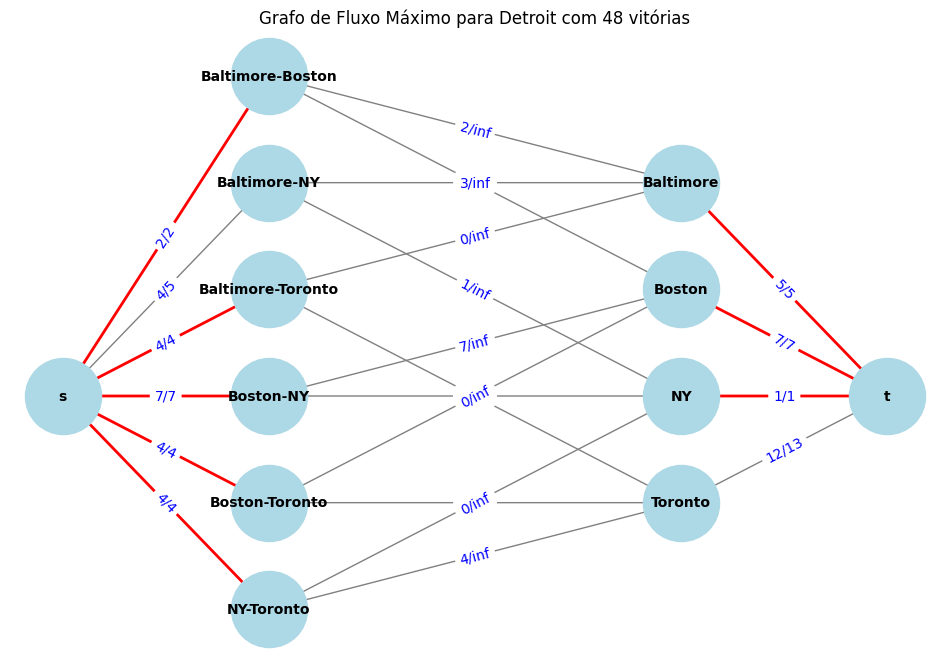


--- Análise do Corte Mínimo ---
Valor do corte mínimo: 25
Conjunto S do corte (nós do lado da fonte): {'Boston', 'NY', 'Boston-NY', 'Baltimore', 'Baltimore-NY', 'Baltimore-Boston', 's'}
Conjunto T do corte (nós do lado do sumidouro): {'Baltimore-Toronto', 'Boston-Toronto', 't', 'Toronto', 'NY-Toronto'}


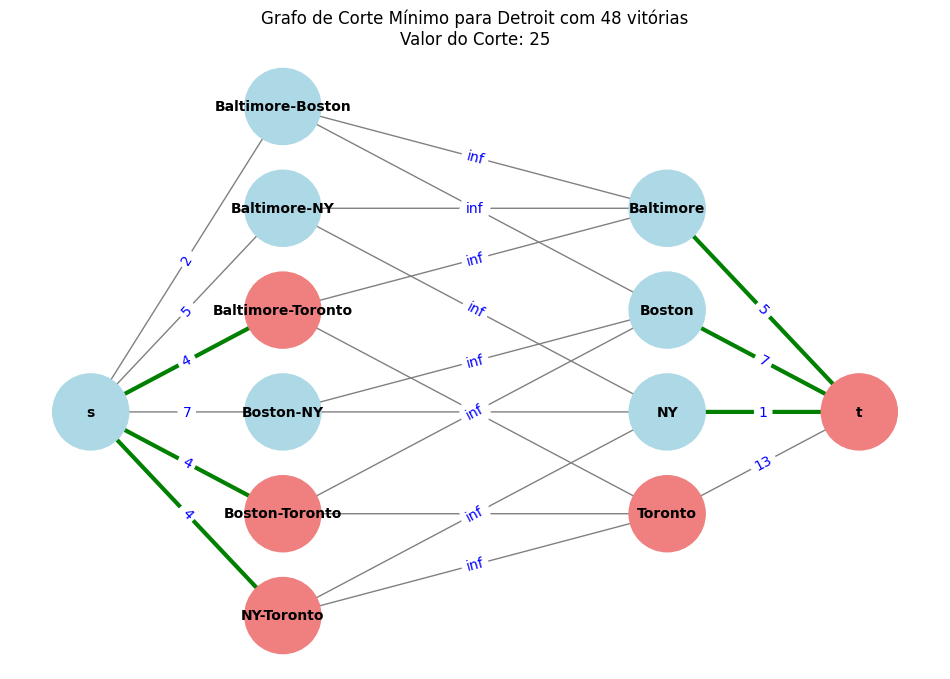


--- Análise Detalhada da Eliminação ---
As equipes que formam o certificado de eliminação (pertencentes ao conjunto S do corte) são: NY, Baltimore, Boston
Para o subconjunto de equipes R = {NY, Baltimore, Boston}:
  Vitórias totais atuais (w(R)): 215
  Jogos restantes entre elas (g(R)): 14
  Média de vitórias por equipe neste subconjunto (a(R)): 76.33
  Máximo de vitórias possíveis para Detroit (wi + gi): 76
Como a média de vitórias a(R) (76.33) é maior que o máximo de vitórias possíveis de Detroit (76),
este subconjunto R de equipes prova que Detroit está eliminado. Pelo menos uma equipe em R terminará com mais vitórias que Detroit.

--- Conclusão Final ---
Com 48 vitórias atuais, Detroit ESTÁ matematicamente eliminado.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Dados do Problema ---
# Informações das equipes (exceto Detroit) conforme a Tabela 1 do MIT6_046JS15_lec14B.pdf.
# 'w' representa as vitórias atuais (wi).
teams_data = {
    'NY': {'w': 75},
    'Baltimore': {'w': 71},
    'Boston': {'w': 69},
    'Toronto': {'w': 63},
}

# Jogos restantes entre as equipes (g_ij), também da Tabela 1 do MIT6_046JS15_lec14B.pdf.
# Estes são os jogos entre as equipes que não são Detroit.
games_between_teams = {
    'NY': {'Baltimore': 5, 'Boston': 7, 'Toronto': 4},
    'Baltimore': {'NY': 5, 'Boston': 2, 'Toronto': 4},
    'Boston': {'NY': 7, 'Baltimore': 2, 'Toronto': 4},
    'Toronto': {'NY': 4, 'Baltimore': 4, 'Boston': 4},
}

# Dados específicos de Detroit, conforme a sua solicitação.
detroit_wins_current = 48
detroit_games_remaining = 28
# O máximo de vitórias que Detroit pode atingir se ganhar todos os jogos restantes.
detroit_max_possible_wins = detroit_wins_current + detroit_games_remaining

print(f"--- Dados da Análise ---")
print(f"Vitórias atuais de Detroit: {detroit_wins_current}")
print(f"Jogos restantes de Detroit: {detroit_games_remaining}")
print(f"Máximo de vitórias possíveis para Detroit (W): {detroit_max_possible_wins}\n")

# --- 2. Construção do Grafo de Fluxo ---
def create_baseball_elimination_graph(teams_data, games_between_teams, detroit_max_possible_wins):
    G = nx.DiGraph()
    s = 's'  # Nó fonte
    t = 't'  # Nó sumidouro

    # Adicionar o nó fonte e o nó sumidouro
    G.add_node(s)
    G.add_node(t)

    # Obter os nomes das equipes ordenados para garantir consistência na criação dos nós de jogo
    sorted_team_names = sorted(teams_data.keys())
    
    # Adicionar nós para os jogos entre as equipes e as arestas da fonte
    for i in range(len(sorted_team_names)):
        for j in range(i + 1, len(sorted_team_names)):
            team1 = sorted_team_names[i]
            team2 = sorted_team_names[j]
            
            # A capacidade é o número de jogos restantes entre team1 e team2.
            # Verificamos em ambas as direções no dicionário games_between_teams para robustez.
            capacity = games_between_teams[team1].get(team2, games_between_teams.get(team2, {}).get(team1, 0))
            
            if capacity > 0:
                # O nome do nó do jogo é uma concatenação dos nomes das equipes (ex: 'NY-Baltimore')
                game_node_name = f"{team1}-{team2}"
                G.add_node(game_node_name)
                
                # Aresta da fonte para o nó do jogo com capacidade = número de jogos restantes
                G.add_edge(s, game_node_name, capacity=capacity)
                
                # Arestas do nó do jogo para os nós das equipes com capacidade "infinita" (um valor grande)
                G.add_edge(game_node_name, team1, capacity=float('inf'))
                G.add_edge(game_node_name, team2, capacity=float('inf'))
    
    # Adicionar nós para as equipes e arestas para o sumidouro
    # A capacidade da aresta de uma equipe para o sumidouro é (W - vitórias atuais da equipe)
    for team, data in teams_data.items():
        G.add_node(team)
        capacity_to_t = detroit_max_possible_wins - data['w']
        G.add_edge(team, t, capacity=capacity_to_t)
        
    return G, s, t, sorted_team_names

# Construir o grafo usando os dados corrigidos da fonte MIT
G, s, t, teams_list_for_plot = create_baseball_elimination_graph(
    teams_data, games_between_teams, detroit_max_possible_wins
)

# --- 3. Cálculo do Fluxo Máximo ---
flow_value, flow_dict = nx.maximum_flow(G, s, t)

print(f"--- Resultado do Fluxo Máximo ---")
print(f"Valor do fluxo máximo encontrado: {flow_value}")

# Calcular a soma das capacidades das arestas que saem da fonte.
# No exemplo do MIT (Figura 1 e Teorema 1), essa soma é 26.
total_capacity_from_s = sum(G[s][v]['capacity'] for v in G.neighbors(s))
print(f"Capacidade total das arestas que saem da fonte ('s'): {total_capacity_from_s}")

# Determinar se Detroit está eliminado
# De acordo com o Teorema 1 do MIT6_046JS15_lec14B.pdf, Detroit é eliminado se o fluxo máximo
# não satura todas as arestas que saem da fonte (ou seja, `max_flow_value < total_capacity_from_s`).
if flow_value == total_capacity_from_s:
    print(f"\nDetroit NÃO está matematicamente eliminado.")
    print(f"O fluxo máximo ({flow_value}) é igual à capacidade total das arestas que saem da fonte ({total_capacity_from_s}).")
else:
    print(f"\nDetroit ESTÁ matematicamente eliminado.")
    print(f"O fluxo máximo ({flow_value}) é menor que a capacidade total das arestas que saem da fonte ({total_capacity_from_s}).")
    print(f"Isso significa que não é possível alocar todos os jogos restantes entre as outras equipes e ainda manter todas abaixo do limite de vitórias de Detroit.")

# --- 4. Visualização do Grafo de Fluxo Máximo ---
def plot_flow_graph(G, flow_dict, s, t, teams_for_layout, title="Grafo de Fluxo Máximo"):
    plt.figure(figsize=(12, 8))
    pos = {}
    
    # Definir posições para um layout mais claro do grafo bipartido
    pos[s] = (-2, 0)
    pos[t] = (2, 0)

    game_nodes_sorted = sorted([n for n in G.nodes() if '-' in n])
    team_nodes_sorted = sorted(teams_for_layout) 

    y_spacing_game = 0.5 # Espaçamento vertical entre os nós de jogo
    y_spacing_team = 0.5 # Espaçamento vertical entre os nós de equipe
    
    for i, node in enumerate(game_nodes_sorted):
        pos[node] = (-1, (len(game_nodes_sorted) / 2 - i) * y_spacing_game)

    for i, node in enumerate(team_nodes_sorted):
        pos[node] = (1, (len(team_nodes_sorted) / 2 - i) * y_spacing_team)

    # Desenhar nós e rótulos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Adicionar rótulos de aresta (fluxo/capacidade)
    edge_labels = {}
    for u, v, data in G.edges(data=True):
        capacity = data['capacity']
        flow = flow_dict[u][v]
        edge_labels[(u, v)] = f"{int(flow)}/{int(capacity) if capacity != float('inf') else 'inf'}"
        
        # Colorir arestas saturadas (fluxo = capacidade) de vermelho
        if capacity != float('inf') and flow == capacity:
            nx.draw_networkx_edges(G, pos, edgelist=[(u,v)], edge_color='red', width=2)
        else:
            nx.draw_networkx_edges(G, pos, edgelist=[(u,v)], edge_color='gray', width=1)

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

    plt.title(title)
    plt.axis('off') # Desliga os eixos
    plt.show()

# Gerar e exibir o grafo de fluxo máximo
plot_flow_graph(G, flow_dict, s, t, teams_list_for_plot, 
                f"Grafo de Fluxo Máximo para Detroit com {detroit_wins_current} vitórias")

# --- 5. Cálculo e Visualização do Corte Mínimo ---
cut_value, partition = nx.minimum_cut(G, s, t)
S_set, T_set = partition

print(f"\n--- Análise do Corte Mínimo ---")
print(f"Valor do corte mínimo: {cut_value}")
print(f"Conjunto S do corte (nós do lado da fonte): {S_set}")
print(f"Conjunto T do corte (nós do lado do sumidouro): {T_set}")

def plot_min_cut_graph(G, S_set, T_set, cut_value, s, t, teams_for_layout, title="Grafo com Corte Mínimo"):
    plt.figure(figsize=(12, 8))
    pos = {}
    
    # Definir posições para um layout mais claro
    pos[s] = (-2, 0)
    pos[t] = (2, 0)

    game_nodes_sorted = sorted([n for n in G.nodes() if '-' in n])
    team_nodes_sorted = sorted(teams_for_layout)

    y_spacing_game = 0.5
    y_spacing_team = 0.5
    
    for i, node in enumerate(game_nodes_sorted):
        pos[node] = (-1, (len(game_nodes_sorted) / 2 - i) * y_spacing_game)

    for i, node in enumerate(team_nodes_sorted):
        pos[node] = (1, (len(team_nodes_sorted) / 2 - i) * y_spacing_team)

    # Colorir nós com base na partição do corte
    node_colors = ['lightblue' if node in S_set else 'lightcoral' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    cut_edges = []
    non_cut_edges = []
    
    edge_labels = {}
    for u, v, data in G.edges(data=True):
        capacity = data['capacity']
        edge_labels[(u, v)] = f"{int(capacity) if capacity != float('inf') else 'inf'}"
        if u in S_set and v in T_set: # Aresta que cruza o corte
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    # Desenhar arestas que não cruzam o corte
    nx.draw_networkx_edges(G, pos, edgelist=non_cut_edges, edge_color='gray', width=1)
    # Desenhar arestas que cruzam o corte em uma cor diferente
    nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color='green', width=3)

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

    plt.title(f"{title}\nValor do Corte: {cut_value}")
    plt.axis('off')
    plt.show()

# Gerar e exibir o grafo de corte mínimo
plot_min_cut_graph(G, S_set, T_set, cut_value, s, t, teams_list_for_plot, 
                   f"Grafo de Corte Mínimo para Detroit com {detroit_wins_current} vitórias")

# --- 6. Análise da Eliminação através do Corte Mínimo ---
eliminating_teams = []
# As equipes no conjunto S do corte (excluindo a fonte 's') formam o "certificado de eliminação".
for team in teams_data.keys(): # Iterar sobre os nomes originais das equipes
    if team in S_set and team != s:
        eliminating_teams.append(team)

print(f"\n--- Análise Detalhada da Eliminação ---")
if len(eliminating_teams) > 0:
    print(f"As equipes que formam o certificado de eliminação (pertencentes ao conjunto S do corte) são: {', '.join(eliminating_teams)}")
    
    # Calcular w(R) e g(R) para o conjunto identificado pelo corte (conforme baseball_talk.pdf e A NEW PROPERTY...)
    # w(R) = soma das vitórias atuais das equipes em R
    w_R = sum(teams_data[team]['w'] for team in eliminating_teams)
    
    # g(R) = soma dos jogos restantes entre as equipes em R
    g_R = 0
    eliminating_teams_sorted = sorted(eliminating_teams) # Ordenar para acesso consistente de pares
    for i in range(len(eliminating_teams_sorted)):
        for j in range(i + 1, len(eliminating_teams_sorted)):
            team1 = eliminating_teams_sorted[i]
            team2 = eliminating_teams_sorted[j]
            
            # Recupera a quantidade de jogos entre team1 e team2
            g_R += games_between_teams[team1].get(team2, games_between_teams.get(team2, {}).get(team1, 0))

    num_teams_in_R = len(eliminating_teams)
    
    if num_teams_in_R > 0:
        a_R = (w_R + g_R) / num_teams_in_R
        print(f"Para o subconjunto de equipes R = {{{', '.join(eliminating_teams)}}}:")
        print(f"  Vitórias totais atuais (w(R)): {w_R}")
        print(f"  Jogos restantes entre elas (g(R)): {g_R}")
        print(f"  Média de vitórias por equipe neste subconjunto (a(R)): {a_R:.2f}")
        print(f"  Máximo de vitórias possíveis para Detroit (wi + gi): {detroit_max_possible_wins}")
        
        if a_R > detroit_max_possible_wins:
            print(f"Como a média de vitórias a(R) ({a_R:.2f}) é maior que o máximo de vitórias possíveis de Detroit ({detroit_max_possible_wins}),")
            print(f"este subconjunto R de equipes prova que Detroit está eliminado. Pelo menos uma equipe em R terminará com mais vitórias que Detroit.")
        else:
            print(f"A média de vitórias a(R) ({a_R:.2f}) não é maior que o máximo de vitórias possíveis de Detroit ({detroit_max_possible_wins}).")
            print(f"Isso pode indicar que o corte mínimo encontrado não é o certificado de eliminação explícito da forma a(R) > W,")
            print(f"mas o resultado geral do fluxo máximo já confirmou a eliminação.")

else:
    print("Nenhuma equipe (exceto a fonte 's') foi identificada no conjunto S do corte mínimo. Isso geralmente")
    print("ocorre quando a equipe examinada (Detroit) NÃO está eliminada, pois o corte separa 's'")
    print("de todos os outros nós de uma maneira que não forma um conjunto eliminador de equipes.")

print(f"\n--- Conclusão Final ---")
if flow_value == total_capacity_from_s:
    print(f"Com {detroit_wins_current} vitórias atuais, Detroit NÃO está matematicamente eliminado.")
else:
    print(f"Com {detroit_wins_current} vitórias atuais, Detroit ESTÁ matematicamente eliminado.")